## Implementation of the moving average filter for audio signal processing
This example shows you how to read wav file, apply the moving average filter and play filtered audio.

## Modules

In [ ]:
import numpy as np
from scipy.io import wavfile
import scipy.io
import IPython
import matplotlib.pyplot as plt

#Get the data with wget and the URL
!wget -O jack.wav -cq https://github.com/frhaedo/dsp/blob/main/MA%20filter/jack.wav?raw=true
!wget -O bateria.wav -cq https://github.com/frhaedo/dsp/blob/main/MA%20filter/bateria.wav?raw=true

## Coefficients

In [ ]:
L=20

#coeffs = np.ones(L) #numerator coeffs of filter transfer function
#[1. 1. 1. 1.]

coeffs = (np.ones(L))/L #coeffs of filter  #Moving Average FIR filter
print(coeffs)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


## Read audio data from the WAV file

In [ ]:
#samplerate, data = scipy.io.wavfile.read('bateria.wav')
samplerate, data = scipy.io.wavfile.read('jack.wav')

times = np.arange(len(data))/samplerate
audio=data[:,0] #convert stereo sound to mono
audio = audio.astype(np.float32, order='C') / 32768.0

print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length} s")
print(f"samplerate = {samplerate} kHz")

number of channels = 2
length = 24.28859410430839 s
samplerate = 44100 kHz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


# Filtering the audio using convolution

In [ ]:
filtered = np.convolve(coeffs,audio, mode='same')

### Play the waveform out the speakers

### Original

In [ ]:
IPython.display.Audio(audio, rate=samplerate)

### Filtered

In [ ]:
IPython.display.Audio(filtered, rate=samplerate)

### Compute the FFT
If you need to get amplitude right is necessary to apply the factor of $2/n$. 

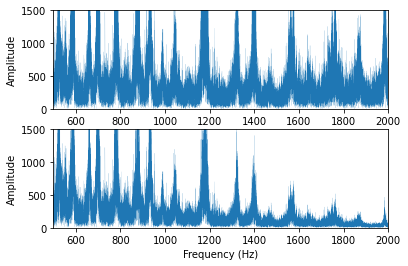

In [ ]:
%matplotlib inline

fft_audio = np.fft.rfft(audio)
freq = np.fft.rfftfreq(audio.size, d=1./samplerate)
n = len(fft_audio)

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio),linewidth=0.1)
plt.ylabel("Amplitude")
plt.xlim(500, 2000)
plt.ylim(0, 1500)

fft_filtered = np.fft.rfft(filtered)
freq = np.fft.rfftfreq(filtered.size, d=1./samplerate)
n = len(fft_audio)

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_filtered),linewidth=0.1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(500, 2000)
plt.ylim(0, 1500)

plt.show()

## Resources
SciPy Documentation: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read"><code>scipy.io.wavfile.read</code></a><br>

IPython:<a href="https://ipython.org/ipython-doc/3/api/generated/IPython.display.html"><code>IPython.display.Audio</code></a><br>

NumPy Documentation: <a href="https://numpy.org/doc/stable/reference/generated/numpy.convolve.html">
<code>numpy.convolve</code><a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html"> <code>nnumpy.fft.rfft</code></a><a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html"> <code>nnumpy.fft.rfftfreq</code></a>